<a href="https://colab.research.google.com/github/FatmaAlkan/pythonquizornekkod/blob/main/elephant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Problem Manzara Sınıflandırması

In [ ]:
import os, shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

Training Validetion ve Test klasörlerini oluşturdum

> Girintili blok



In [ ]:
original_datasetafrican_dir='/content/drive/MyDrive/archive/dataset/train/African'
original_datasetasian_dir='/content/drive/MyDrive/archive/dataset/train/Asian'
base_dir='D:\deeplearniinghw1'

if os.path.exists(base_dir):
  shutil.rmtree(base_dir)

os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_asian_dir = os.path.join(train_dir, 'asian')
os.mkdir(train_asian_dir)

train_african_dir = os.path.join(train_dir, 'african')
os.mkdir(train_african_dir)


validation_asian_dir = os.path.join(validation_dir, 'asian')
os.mkdir(validation_asian_dir)

validation_african_dir = os.path.join(validation_dir, 'african')
os.mkdir(validation_african_dir)


test_asian_dir = os.path.join(test_dir, 'asian')
os.mkdir(test_asian_dir)

test_african_dir = os.path.join(test_dir, 'african')
os.mkdir(test_african_dir)

Resimleri oluşturduğum training validetion ve test klasörlerine gönderdim

In [ ]:
fnames = ['as_tr{}.jpg' .format(i) for i in range(1,300)]
for fname in fnames:
  src = os.path.join(original_datasetasian_dir, fname)
  dst = os.path.join(train_asian_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['as_tr{}.jpg' .format(i) for i in range(301, 350)]
for fname in fnames:
  src = os.path.join(original_datasetasian_dir, fname)
  dst = os.path.join(validation_asian_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['as_tr{}.jpg' .format(i) for i in range(351, 420)]
for fname in fnames:
  src = os.path.join(original_datasetasian_dir, fname)
  dst = os.path.join(test_asian_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['af_tr{}.jpg' .format(i) for i in range(1,300)]
for fname in fnames:
  src = os.path.join(original_datasetafrican_dir, fname)
  dst = os.path.join(train_african_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['af_tr{}.jpg' .format(i) for i in range(301, 350)]
for fname in fnames:
  src = os.path.join(original_datasetafrican_dir, fname)
  dst = os.path.join(validation_african_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
fnames = ['af_tr{}.jpg' .format(i) for i in range(351,420)]
for fname in fnames:
  src = os.path.join(original_datasetafrican_dir, fname)
  dst = os.path.join(test_african_dir, fname)
  shutil.copyfile(src, dst)

Her bir training validetion ve test klasörnde kaçar tane resim olduğunu gödterdim  

In [ ]:
print('total training building images:', len(os.listdir(train_asian_dir)))
print('total training forest images:', len(os.listdir(train_african_dir)))

print('total valid building images:', len(os.listdir(validation_asian_dir)))
print('total valid forest images:', len(os.listdir(validation_african_dir)))

print('total test building images:', len(os.listdir(test_asian_dir)))
print('total test forest images:', len(os.listdir(test_african_dir)))

total training building images: 299
total training forest images: 299
total valid building images: 49
total valid forest images: 49
total test building images: 69
total test forest images: 69


Problemim sınıflandırma olduğu için her sınıfa ait bir resim gösteriyorum

1- Asian Elephant:


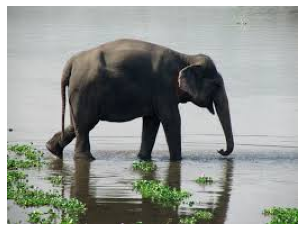

In [ ]:
import cv2
im_plt = plt.imread("/content/drive/MyDrive/archive/dataset/train/Asian/as_tr1.jpg")
im_cv = cv2.imread("/content/drive/MyDrive/archive/dataset/train/Asian/as_tr1.jpg")[:, :, ::-1]

plt.axis("off")

print('1- Asian Elephant:')
plt.imshow(im_cv)

1- African Elephant:


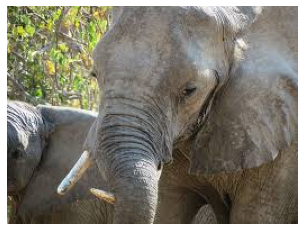

In [ ]:
im_plt = plt.imread("/content/D:\deeplearniing3/train/african/af_tr1.jpg")
im_cv = cv2.imread("/content/D:\deeplearniing3/train/african/af_tr1.jpg")[:, :, ::-1]

plt.axis("off")

print('1- African Elephant:')
plt.imshow(im_cv)

CNN modelim

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

CNN Modelinin Özetini çıktı olarak aldım

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

CNN Modelini compile ediyorum

ImageDataGenerator classını normalizasyon yapmak için kullandım

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 598 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


Normalizasyona hazır hale getirmek için batch shape yaptım

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Trainingi başlattım bir yandan historye kaydettim

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/20


<ipython-input-155-5c0cf950d51c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


5/5 [==============================] - 6s 1s/step - loss: 0.5802 - acc: 0.6837 - val_loss: 0.7444 - val_acc: 0.5510
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 0.5524 - acc: 0.7300 - val_loss: 0.6982 - val_acc: 0.5306
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.6221 - acc: 0.6800 - val_loss: 0.6921 - val_acc: 0.5714
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.5729 - acc: 0.7200 - val_loss: 0.6860 - val_acc: 0.5714
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.5657 - acc: 0.7200 - val_loss: 0.6906 - val_acc: 0.5510
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.5841 - acc: 0.7143 - val_loss: 0.7069 - val_acc: 0.5612
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.5977 - acc: 0.6800 - val_loss: 0.7263 - val_acc: 0.5918
Epoch 8/20
5/5 [==============================] - 7s 1s/step - loss: 0.5726 - acc: 0.7100 - val_loss: 0.7100 - val_acc: 0.

Modelimi kaydediyorum

In [ ]:
model.save('asiaveafricanfil_cesitleri')

Eğitim ve doğrulama başarısını grafik olarak çizdirdim

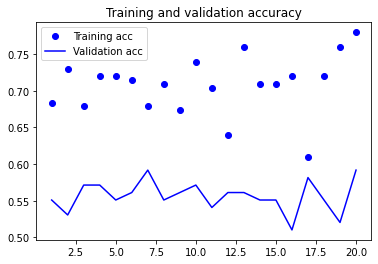

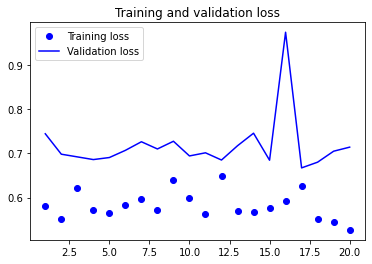

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5)

Found 598 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


<ipython-input-163-19487c5022f3>:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 0.7006 - acc: 0.5500

5/5 [==============================] - 9s 2s/step - loss: 0.7006 - acc: 0.5500 - val_loss: 0.6929 - val_acc: 0.5102
Epoch 2/20
5/5 [==============================] - 10s 2s/step - loss: 0.6921 - acc: 0.5188
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.6957 - acc: 0.5125
Epoch 4/20
5/5 [==============================] - 9s 2s/step - loss: 0.6897 - acc: 0.5437
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 0.6947 - acc: 0.5200
Epoch 6/20
5/5 [==============================] - 7s 2s/step - loss: 0.6901 - acc: 0.5333
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.6880 - acc: 0.5400
Epoch 8/20
5/5 [==============================] - 7s 1s/step - loss: 0.6984 - acc: 0.5067
Epoch 9/20
5/5 [==============================] - 7s 1s/step - loss: 0.6836 - acc: 0.5733
Epoch 10/20
5/5 [==============================] - 9s 2s/step - loss: 0.6873 - acc: 0.5437
Epoch 11/20
5/5 [==============================] - 9s 2s/step - loss: 0.

In [ ]:
model.save('asiaveafricanfil_cesitleri')

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=5)

Found 598 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
<ipython-input-168-623e3b98fb36>:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


5/5 [==============================] - 7s 1s/step - loss: 0.6758 - acc: 0.5900 - val_loss: 0.6786 - val_acc: 0.5612
Epoch 2/25
5/5 [==============================] - 6s 1s/step - loss: 0.6636 - acc: 0.6200 - val_loss: 0.6772 - val_acc: 0.5612
Epoch 3/25
5/5 [==============================] - 6s 1s/step - loss: 0.6603 - acc: 0.6300 - val_loss: 0.6864 - val_acc: 0.5408
Epoch 4/25
5/5 [==============================] - 8s 2s/step - loss: 0.6761 - acc: 0.5600 - val_loss: 0.6793 - val_acc: 0.5612
Epoch 5/25
5/5 [==============================] - 6s 1s/step - loss: 0.6658 - acc: 0.6100 - val_loss: 0.6768 - val_acc: 0.5306
Epoch 6/25
5/5 [==============================] - 6s 1s/step - loss: 0.6826 - acc: 0.5102 - val_loss: 0.6815 - val_acc: 0.5510
Epoch 7/25
5/5 [==============================] - 6s 1s/step - loss: 0.6590 - acc: 0.6100 - val_loss: 0.6806 - val_acc: 0.5510
Epoch 8/25
5/5 [==============================] - 6s 1s/step - loss: 0.6774 - acc: 0.6000 - val_loss: 0.6901 - val_acc: 0.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/20


<ipython-input-171-ea69dbc8a68a>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


5/5 [==============================] - 8s 1s/step - loss: 0.6970 - acc: 0.5300 - val_loss: 0.6763 - val_acc: 0.5306
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 0.6846 - acc: 0.5400 - val_loss: 0.6778 - val_acc: 0.5510
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.6754 - acc: 0.5400 - val_loss: 0.6793 - val_acc: 0.5612
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.6565 - acc: 0.6400 - val_loss: 0.6771 - val_acc: 0.5408
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.6442 - acc: 0.6500 - val_loss: 0.6797 - val_acc: 0.5612
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.6580 - acc: 0.6400 - val_loss: 0.6853 - val_acc: 0.5612
Epoch 7/20
5/5 [==============================] - 6s 1s/step - loss: 0.6661 - acc: 0.5918 - val_loss: 0.6829 - val_acc: 0.5408
Epoch 8/20
5/5 [==============================] - 6s 1s/step - loss: 0.6555 - acc: 0.6300 - val_loss: 0.6796 - val_acc: 0.

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 138 images belonging to 2 classes.


<ipython-input-172-19f8443b6c42>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.5652173757553101


In [ ]:
from keras.models import load_model
model = load_model('asiaveafricanfil_cesitleri')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 17, 17, 128)     